# <u>Altering existing tables.

### 1) customers table.

### Standardising column names to snake_case.

(Each line of code ran seperately.)

```sql
ALTER TABLE customers RENAME COLUMN "Client ID" TO client_id;
ALTER TABLE customers RENAME COLUMN "Name" TO name;
ALTER TABLE customers RENAME COLUMN "Age" TO age;
ALTER TABLE customers RENAME COLUMN "Location ID" TO location_id;
ALTER TABLE customers RENAME COLUMN "Joined Bank" TO joined_bank;
ALTER TABLE customers RENAME COLUMN "Banking Contact" TO banking_contact;
ALTER TABLE customers RENAME COLUMN "Nationality" TO nationality;
ALTER TABLE customers RENAME COLUMN "Occupation" TO occupation;
ALTER TABLE customers RENAME COLUMN "Fee Structure" TO fee_structure;
ALTER TABLE customers RENAME COLUMN "Loyalty Classification" TO loyalty_classification;
ALTER TABLE customers RENAME COLUMN "Estimated Income" TO estimated_income;
ALTER TABLE customers RENAME COLUMN "Superannuation Savings" TO superannuation_savings;
ALTER TABLE customers RENAME COLUMN "Amount of Credit Cards" TO amount_of_credit_cards;
ALTER TABLE customers RENAME COLUMN "Credit Card Balance" TO credit_card_balance;
ALTER TABLE customers RENAME COLUMN "Bank Loans" TO bank_loans;
ALTER TABLE customers RENAME COLUMN "Bank Deposits" TO bank_deposits;
ALTER TABLE customers RENAME COLUMN "Checking Accounts" TO checking_accounts;
ALTER TABLE customers RENAME COLUMN "Saving Accounts" TO saving_accounts;
ALTER TABLE customers RENAME COLUMN "Foreign Currency Account" TO foreign_currency_account;
ALTER TABLE customers RENAME COLUMN "Business Lending" TO business_lending;
ALTER TABLE customers RENAME COLUMN "Properties Owned" TO properties_owned;
ALTER TABLE customers RENAME COLUMN "Risk Weighting" TO risk_weighting;
ALTER TABLE customers RENAME COLUMN "BRId" TO brid;
ALTER TABLE customers RENAME COLUMN "GenderId" TO gender_id;
ALTER TABLE customers RENAME COLUMN "IAId" TO ia_id;
```

### 2)banking_relationships table. 

```sql
ALTER TABLE banking_relationships RENAME COLUMN "BRId" TO brid;
ALTER TABLE banking_relationships RENAME COLUMN "Banking Relationship" TO banking_relationship;
```

### 3) gender_relationships table.

```sql
ALTER TABLE gender_relationships RENAME COLUMN "GenderId" TO gender_id;
ALTER TABLE gender_relationships RENAME COLUMN "Gender" TO gender;
```

### 4) investment_advisors table.

```sql
ALTER TABLE investment_advisors RENAME COLUMN "IAId" TO ia_id;
ALTER TABLE investment_advisors RENAME COLUMN "Investment Advisor" TO investment_advisor;
```

---
---

# <u>SQL Query.

### 1) What are total clients, total Bank Loans, total Bank Deposits, and total Credit Card Balance across the entire portfolio?

```sql
SELECT
	COUNT(DISTINCT(client_id)) AS total_clients,
	COALESCE(SUM(bank_loans), 0) AS total_bank_loans,
	COALESCE(SUM(bank_deposits), 0)  AS total_bank_deposits,
    COALESCE(SUM(credit_card_balance), 0) AS total_credit_card_balance
FROM customers;
```

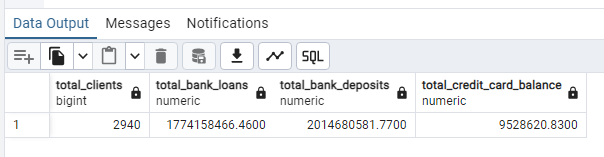

---

### 2) What are average, median, min, and max for Bank Loans, Bank Deposits, and Credit Card Balance per client and per Banking Relationship?

- ***Per client:***

```sql
SELECT
	client_id,
	AVG(bank_loans) AS avg_bank_loans,
	MIN(bank_loans) AS min_bank_loans,
	MAX(bank_loans) AS max_bank_loans,
	AVG(bank_deposits) AS avg_bank_deposits,
	MIN(bank_deposits) AS min_bank_deposits,
	MAX(bank_deposits) AS max_bank_deposits,
	AVG(credit_card_balance) AS avg_credit_card_balance,
	MIN(credit_card_balance) AS min_credit_card_balance,
	MAX(credit_card_balance) AS max_credit_card_balance
FROM customers
GROUP BY client_id
LIMIT '5';
```

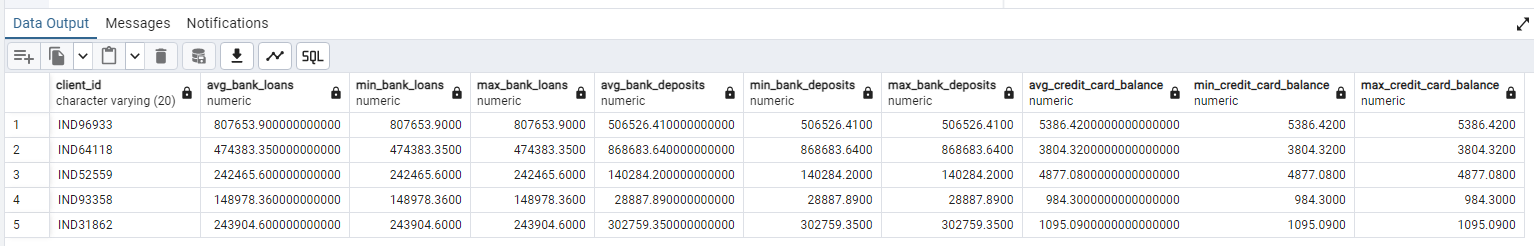

- ***Per banking relationship:***

```sql
SELECT
	br.banking_relationship,
	AVG(c.bank_loans) AS avg_bank_loans,
	MIN(c.bank_loans) AS min_bank_loans,
	MAX(c.bank_loans) AS max_bank_loans,
	AVG(c.bank_deposits) AS avg_bank_deposits,
	MIN(c.bank_deposits) AS min_bank_deposits,
	MAX(c.bank_deposits) AS max_bank_deposits,
	AVG(c.credit_card_balance) AS avg_credit_card_balance,
	MIN(c.credit_card_balance) AS min_credit_card_balance,
	MAX(c.credit_card_balance) AS max_credit_card_balance
FROM customers AS c
INNER JOIN banking_relationships AS br
ON c.brid = br.brid
GROUP BY br.banking_relationship;
```

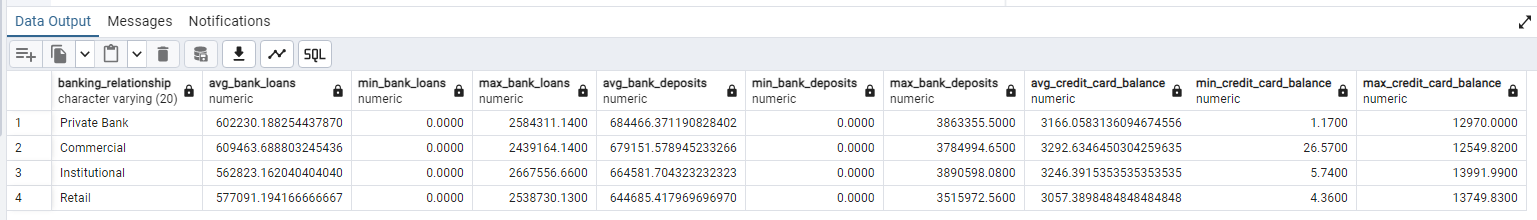

---

### 3) Risk Analysis by Banking Relationship Type: Which banking relationship types have the highest risk exposure and credit utilization?

- ***What is Risk Weighting?***

    - Risk weighting means assigning a percentage (called a risk weight) to different bank assets based on how risky they are.
    - Assets include Loans (home loans, personal loans, business loans, etc.), Credit card exposures(they’re unsecured loans, and they carry higher risk weights because default chances are higher, other receivables.
    - Example: A loan to the government is very safe → low risk weight (like 0%).
               A loan to a startup is risky → high risk weight (like 100% or more).

- ***Why is it Done?***

    - Banks are required (by regulators like RBI, Basel norms) to hold some minimum capital (their own money) as a safety buffer.
    - Risk weighting ensures that banks hold more capital for riskier assets and less for safer assets.
    - This protects depositors and the financial system if loans go bad.

- ***How is it Calculated?***

    - Risk-Weighted Asset(RWA) = Asset Value × Risk Weight
    - Then the bank adds up RWAs for all assets.
    - If ₹100 crore is lent to Govt. of India with 0% weight → RWA = 0.
    - If ₹100 crore is lent to a corporate with 100% weight → RWA = ₹100 crore.
    - Finally, banks must keep a minimum Capital Adequacy Ratio (CAR):
    - CAR = Bank’s Own Capital / Total RWA
    - In short: Risk weighting is a way to adjust assets by their riskiness, so banks don’t treat all loans as equally safe.
    - Risk weight is set by regulators (like RBI, Basel Committee).
    - It depends on:

                    Type of borrower (govt, bank, corporate, retail, etc.)
                    Type of loan (secured like home loan vs unsecured like credit card)
                    Credit rating of borrower
                    Collateral/security available
                    Example:
                            Govt. bonds → 0%
                            Home loans → ~35–50%
                            Corporate loans → 100%
                            Credit cards → 125%+
                    So, it’s not chosen by the bank—it’s prescribed in regulation.

- ***SQL Query:***

```sql
SELECT 
    br.banking_relationship,
    AVG(c.risk_weighting) AS avg_risk_weighting,
    SUM(c.bank_loans) AS total_loans,
    SUM(c.credit_card_balance) AS total_cc_debt,
    SUM(c.bank_deposits) AS total_deposits,
    ROUND(SUM(c.bank_loans) / SUM(c.bank_deposits), 2) AS loan_to_deposit_ratio
FROM customers AS c
INNER JOIN banking_relationships AS br 
ON c.brid = br.brid
GROUP BY br.banking_relationship
HAVING AVG(c.risk_weighting) > 2
ORDER BY avg_risk_weighting DESC;
```

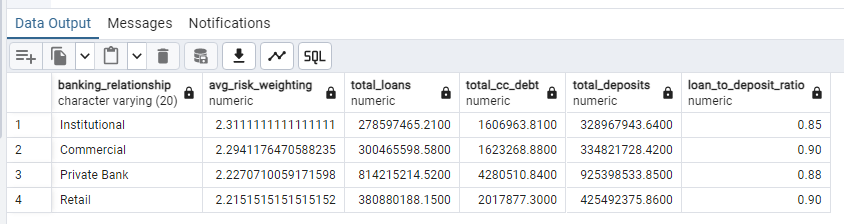

***Key Insights:***

- Institutional has the highest average risk weighting but also the lowest loan‑to‑deposit ratio (0.85), suggesting comparatively stronger deposit coverage of its lending book despite higher modeled risk.
- Commercial and Retail operate with the tightest liquidity at roughly 0.90 loan‑to‑deposit ratios, indicating more aggressive loan deployment relative to deposits and greater sensitivity to funding swings.
- Private Bank carries the largest absolute balances for both loans and deposits and shows the highest credit‑card debt, pointing to an affluent yet more leveraged client base.

---

### 4) High-Value Client Segmentation by Demographics: Identify profitable client segments based on income, deposits, and demographics.

```sql
SELECT 
    g.gender,
    c.nationality,
    CASE 
        WHEN c.estimated_income >= 300000 THEN 'High Income'
        WHEN c.estimated_income >= 150000 THEN 'Medium Income'
        ELSE 'Lower Income'
    END AS income_bracket,
	COUNT(*) as client_count,
    AVG(c.bank_deposits) AS avg_deposits,
    SUM(c.bank_deposits) AS total_deposits
FROM customers AS c
INNER JOIN gender_relationships AS g 
ON c.gender_id = g.gender_id
WHERE c.bank_deposits > 200000
GROUP BY g.gender, c.nationality,
	CASE 
        WHEN c.estimated_income >= 300000 THEN 'High Income'
        WHEN c.estimated_income >= 150000 THEN 'Medium Income'
        ELSE 'Lower Income'
    END
ORDER BY total_deposits DESC;
```

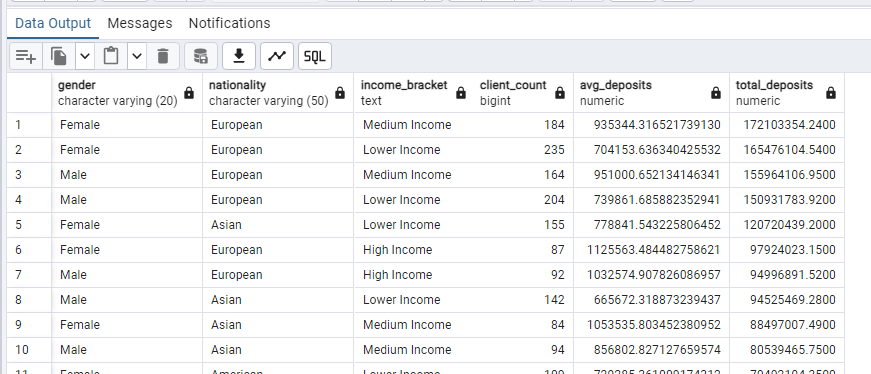

***Key Insights:***

- Top deposits are concentrated among European clients in Medium and Lower income brackets, with Female–European Medium Income leading both average and total deposits among the shown rows.

- Despite High Income segments appearing, several Medium/Lower income groups (across European and Asian) still drive large total deposits via higher client counts, suggesting scale outweighs per-client averages in deposit contribution.

---

### 5) Investment Advisor Performance Comparison: Which investment advisors manage the most profitable client portfolios?

```sql
SELECT
	ia.investment_advisor,
	COUNT(*) AS clients_managed,
	AVG(c.estimated_income) AS avg_client_income,
	SUM(COALESCE(c.bank_deposits,0) + COALESCE(c.saving_accounts,0) + COALESCE(c.checking_accounts,0)) AS total_assets_managed,
 	AVG(COALESCE(c.bank_deposits,0) + COALESCE(c.saving_accounts,0) + COALESCE(c.checking_accounts,0)) AS avg_assets_per_client,
	COUNT(CASE 
		WHEN c.properties_owned > 0 THEN 1 
		ELSE 0
		END) AS clients_with_property
FROM customers AS c
INNER JOIN investment_advisors AS ia
ON c.ia_id = ia.ia_id
GROUP BY ia.investment_advisor
HAVING COUNT(*) >= 5
ORDER BY total_assets_managed DESC
LIMIT 10;
```

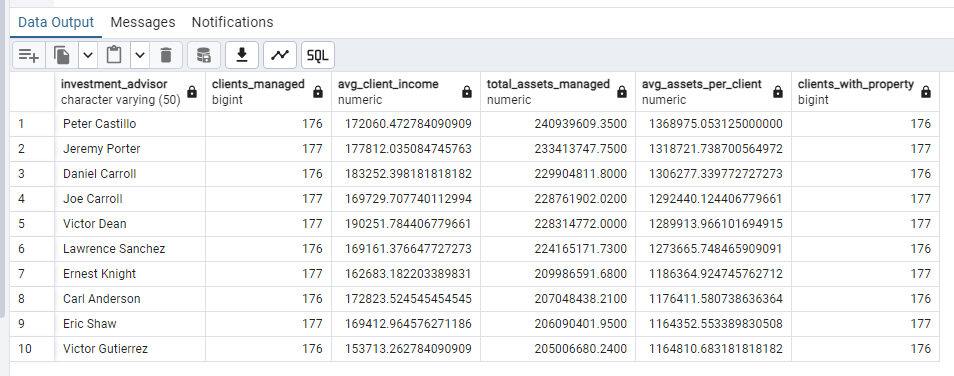

***Top 10 advisors by Deposits vs Loans using UNION ALL.***

```sql
(
	SELECT 
		'DEPOSITS' AS metric,
		ia.investment_advisor,
		COUNT(*) AS clients_managed,
		SUM(COALESCE(c.bank_deposits,0) + COALESCE(c.saving_accounts,0) + COALESCE(c.checking_accounts,0)) AS total_value,
		AVG(COALESCE(c.bank_deposits,0) + COALESCE(c.saving_accounts,0) + COALESCE(c.checking_accounts,0)) AS avg_value_per_client
	FROM customers AS c
	JOIN investment_advisors AS ia
		ON c.ia_id = ia.ia_id
	GROUP BY ia.investment_advisor
	HAVING COUNT(*) >= 5
	ORDER BY total_value DESC
	LIMIT 10
)
UNION ALL
(
	SELECT 
		'LOANS' AS metric,
		ia.investment_advisor,
		COUNT(*) AS clients_managed,
		SUM(COALESCE(c.bank_loans,0)) AS total_value,
		AVG(COALESCE(c.bank_loans,0)) AS avg_value_per_client
	FROM customers AS c
	JOIN investment_advisors AS ia
		ON c.ia_id = ia.ia_id
	GROUP BY ia.investment_advisor
	HAVING COUNT(*) >= 5
	ORDER BY total_value DESC
	LIMIT 10
)
ORDER BY metric, total_value DESC;
```

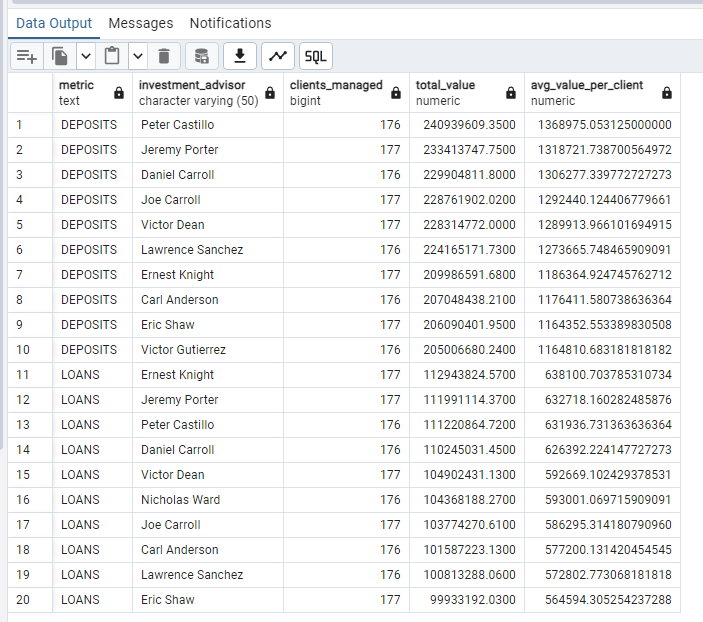

---

### 6) Credit Risk vs. Loyalty Analysis: How does loyalty classification correlate with credit behavior and risk?

```sql
SELECT 
    c.loyalty_classification,
    COUNT(*) AS total_clients,
    AVG(c.credit_card_balance) AS avg_cc_balance,
    AVG(c.bank_loans) AS avg_loans,
    AVG(c.risk_weighting) AS avg_risk,
    SUM(CASE 
			WHEN c.credit_card_balance > c.estimated_income * 0.3 THEN 1 
			ELSE 0 
		END
	) AS high_cc_utilization_count,
    ROUND(
		(SUM(CASE 
				WHEN c.credit_card_balance > c.estimated_income * 0.3 THEN 1 
				ELSE 0 
			END) * 100.0 / COUNT(*)), 2
	) AS high_utilization_percentage
FROM customers AS c
WHERE c.credit_card_balance > 0
GROUP BY c.loyalty_classification
ORDER BY avg_risk DESC;
```

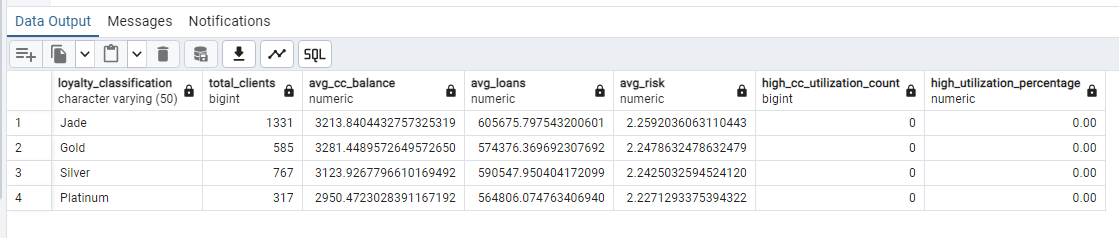

***high_cc_utilization_count***

```sql
SUM(
    CASE 
        WHEN c.credit_card_balance > c.estimated_income * 0.3 THEN 1 
        ELSE 0 
    END
) AS high_cc_utilization_count
```

Meaning: This counts how many clients (within each loyalty class) have a credit card balance greater than 30% of their estimated income.


***high_utilization_percentage***

```sql
ROUND(
    (
        SUM(
            CASE 
                WHEN c.credit_card_balance > c.estimated_income * 0.3 THEN 1 
                ELSE 0 
            END
        ) * 100.0 / COUNT(*)
    ), 2
) AS high_utilization_percentage
```

Meaning: This calculates the percentage of clients in that loyalty group who are high credit card utilizers (balance > 30% of income).

Formula: (number of high utilizers / total clients) × 100

***Key Insights:***

- All the high_cc_utilization_count = 0 means:
    There are no customers where;
    credit_card_balance > estimated_income * 0.3

- This suggests that credit card utilization is generally low across all loyalty tiers, reflecting financial discipline or conservative spending behavior in the dataset.

- Jade likely represents mass or “entry-level” customers, while Platinum could be high-value or elite clients.

- More premium customers (Platinum) may have lower credit risk because of better repayment capacity or credit discipline.

- Interestingly, average loan amounts are highest among Jade customers, suggesting that entry-level clients rely more on bank loans, while premium customers may have lesser borrowing needs or more diversified financial resources.

- Average risk weighting decreases slightly as loyalty increases (Jade → Platinum).

---

### 7) Age-Based Financial Behavior Patterns: Understanding financial behavior across different age groups for targeted products.

```sql
SELECT 
	CASE 
		WHEN c.age < 30 THEN 'Young (18-29)'
		WHEN c.age < 50 THEN 'Middle-aged (30-49)'
		WHEN c.age < 65 THEN 'Pre-retirement (50-64)'
		ELSE 'Senior (65+)' 
	END AS age_group,
	c.fee_structure,
	COUNT(*) AS client_count,
	AVG(c.superannuation_savings) AS avg_retirement_savings,
	AVG(c.properties_owned) AS avg_properties,
	SUM(
		CASE 
			WHEN c.foreign_currency_account > 0 THEN 1 
			ELSE 0 
		END
	) AS clients_with_forex,
	AVG(c.business_lending) AS avg_business_lending
FROM customers AS c
WHERE c.age BETWEEN 18 AND 85
GROUP BY 
	CASE 
		WHEN c.age < 30 THEN 'Young (18-29)'
		WHEN c.age < 50 THEN 'Middle-aged (30-49)'
		WHEN c.age < 65 THEN 'Pre-retirement (50-64)'
		ELSE 'Senior (65+)' 
	END,
	c.fee_structure
ORDER BY age_group, client_count DESC;
```

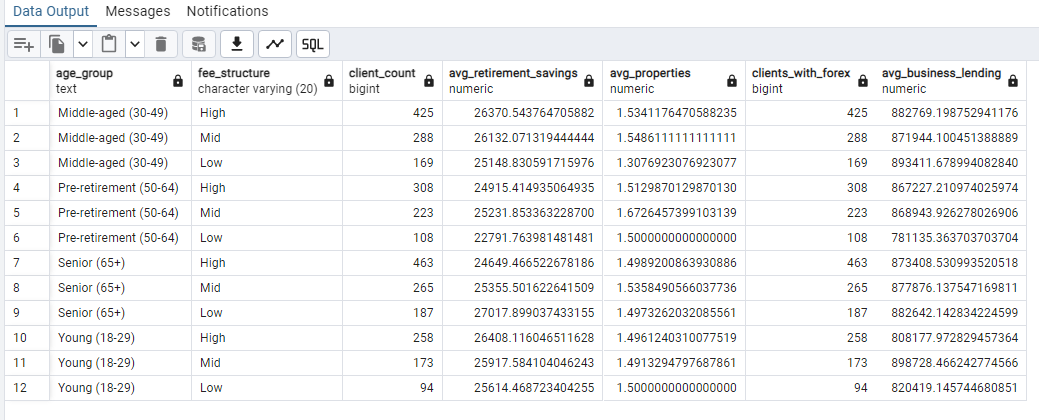

***Key Insights:***

- The single biggest segment is Senior (65+) on High fee structure with 463 clients, while the smallest is Young (18–29) on Low fee structure with 94 clients.
- Average retirement savings peak in Senior (65+) on Low fee structure at ~27,018 and are lowest in Pre‑retirement (50–64) on Low fee structure at ~22,792, showing savings are not strictly monotonic by age or fee structure.
- Property ownership is tightly clustered near 1.5, peaking in Pre‑retirement (50–64) Mid at ~1.673 and dipping to ~1.491 in Young (18–29) Mid.
- The forex-holder count equals client_count in every row, implying 100% foreign-currency-account penetration across all cohorts.
- Average business lending is highest for Young (18–29) Mid at ~898,728 and lowest for Pre‑retirement (50–64) Low at ~781,135, suggesting stronger credit demand in younger mid-fee clients.

---

### 8) Which investment advisors have at least one high‑risk client whose combined credit exposure exceeds the portfolio average?

```sql
SELECT
	ia.investment_advisor,
	COUNT(*) AS total_clients,
    SUM(c.bank_deposits) AS total_deposits,
    SUM(c.bank_loans)   AS total_loans,
    SUM(c.credit_card_balance) AS total_cc_balance
FROM customers AS c
INNER JOIN investment_advisors AS ia
	ON c.ia_id = ia.ia_id
WHERE EXISTS (
    SELECT *
    FROM customers AS c2
    WHERE c2.ia_id = ia.ia_id
      AND c2.risk_weighting >= 3
      AND (c2.bank_loans + c2.credit_card_balance) >
          (SELECT AVG(c3.bank_loans + c3.credit_card_balance)
             FROM customers AS c3)
)
GROUP BY investment_advisor
ORDER BY total_loans DESC;
```

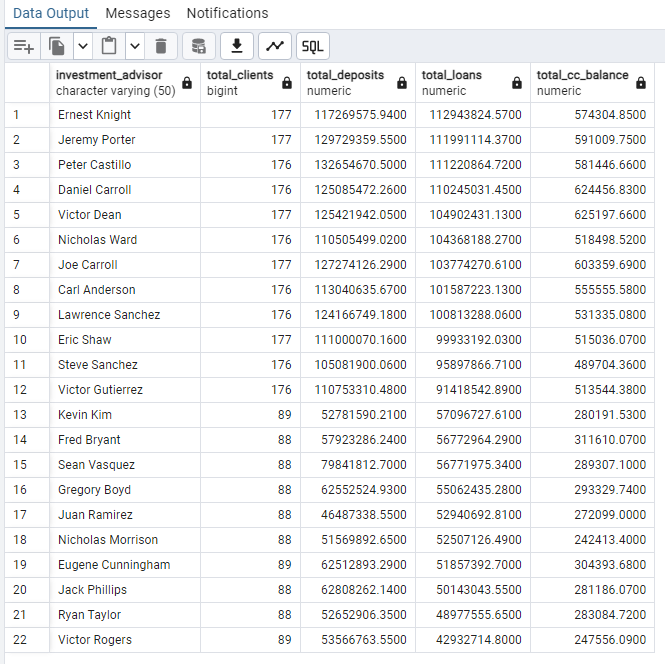

---
---